In [2]:
import math
import time
import statistics
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import xlrd as xd
import matplotlib.pyplot as plt
import openpyxl
from pandas_datareader import data as pdr
pd.options.mode.chained_assignment = None  # default='warn'

# Housing Affordability Index
##### Affordability is a function of the median property price, RBA cash rate and the median wage...
##### How long will it take to pay off a mortgage using 100% of a median wage per year with no deposit.
### Sydney

In [3]:
medianPrice = pd.ExcelFile('data/median price.xls')
mP = pd.read_excel(medianPrice, 'Data1')

cashRate = pd.ExcelFile('data/RBA Cash Rate.xls')
cR = pd.read_excel(cashRate, 'Sheet1')

medianIncome = pd.ExcelFile('data/Earnings.xls')
mI = pd.read_excel(medianIncome, 'Table 1c.1')

weeklyRent = pd.ExcelFile('data/WeeklyRents.xlsx')
wR = pd.read_excel(weeklyRent, 'Sheet1')

## Logic
##### Graph how long does it take to repay a loan with a no deposit on a median price house, using 100% of the median wage to repay it each year, using interest rates from the RBA.
##### If its begining to take a longer time to repay loans we know it's getting more unafordable.

In [4]:
#Step 1: make a dataframe with all the data needed to do this
df = pd.DataFrame(index=range(18), columns=['Year', 'Median Income', 'Median House Price', 'RBA Cash Rate', 'Years to pay mortgage']).fillna(0)

#years
year = 2004
for i in df.index:
    df['Year'][i] = year
    year += 1
df = df.set_index('Year')

In [5]:
#Median Income
incomes = []
for i in mI.index:
    if i > 6 and i < 24:
        incomes.append(mI.iloc[i, [1]].values)
incomes.append(incomes[16] *1.03)
df['Median Income'] = incomes
df['Median Income'] = df['Median Income']*52

In [6]:
#Median House Prices
prices = []
for i in mP.index:
    if i > 15 and i%4 == 0 and i < 22*4-1:
        #pass into array
        prices.append(mP.iloc[i, [1]].values)
df['Median House Price'] = prices
df['Median House Price'] = df['Median House Price'] * 1000

In [7]:
#Median Rent
rents = []
for i in wR.index:
    if i < 12:
        rents.append(wR.iloc[i, [1]].values)
df['Median Rents'] = 0
df.iloc[10:,[4]] = rents
df['Median Rents'] = df['Median Rents'] * 52

In [8]:
#RBA Cash Rate
rates = []
count = 11
for i in cR.index:
    if i > 164:
        if count%11 == 0 and count < 11*19:
            rates.append(cR.iloc[i, [2]].values)
        count += 1
df['RBA Cash Rate'] = rates
df['RBA Cash Rate'] = df['RBA Cash Rate'] / 100

$\huge
n = \frac {log(\frac{1}{-(\frac{PV \times i}{CF}-1)})}{log(1+i)}
$
##### where n = years, PV = present value, i = RBA cash rate, CF = median yearly income

$\huge
r_A = \frac{\sum_{i = 1}^{n}{(ln(\frac{V_e}{V_s}) \div n)}}{i}
$

In [9]:
df['Years to pay mortgage'] = df['Years to pay mortgage'].astype(float)
for i in df.index:
    df['Years to pay mortgage'][i] = math.log(1/-((df['Median House Price'][i]*df['RBA Cash Rate'][i]/df['Median Income'][i])-1)) / math.log(1+df['RBA Cash Rate'][i])

In [10]:
#need another row for 2021 to show effects of the 0.1% rba cash rate...

In [11]:
df['PE Ratio'] = 0.0
for i in df.index:
    if i > 2013:
        df['PE Ratio'][i] = df['Median House Price'][i] / df['Median Rents'][i]

In [18]:
df = df.astype(float)

In [20]:
df

,Median Income,Median House Price,RBA Cash Rate,Years to pay mortgage,Median Rents,PE Ratio
Year,,,,,,
2004,44200.00000,520000.0,0.0525,18.789200,0.0,0.000000
2005,46800.00000,515000.0,0.0550,17.359944,0.0,0.000000
2006,48428.43200,500000.0,0.0550,15.669900,0.0,0.000000
2007,51845.76800,500000.0,0.0625,15.227933,0.0,0.000000
2008,52000.00000,540000.0,0.0725,19.972175,0.0,0.000000
2009,54964.00000,468000.0,0.0300,9.978812,0.0,0.000000
2010,57200.00000,595000.0,0.0425,14.020486,0.0,0.000000
2011,59800.00000,620000.0,0.0475,14.614569,0.0,0.000000
2012,62192.00000,533000.0,0.0425,10.881979,0.0,0.000000


# Results
##### Using Sydney prices but NSW wages...
##### Need more data for the rest of 2021... 
##### Also, this shows it as if interest rates were to stay the same, and incomes too...

<AxesSubplot:title={'center':'Housing Affordability Index'}, xlabel='Year', ylabel='Mortgage Years'>

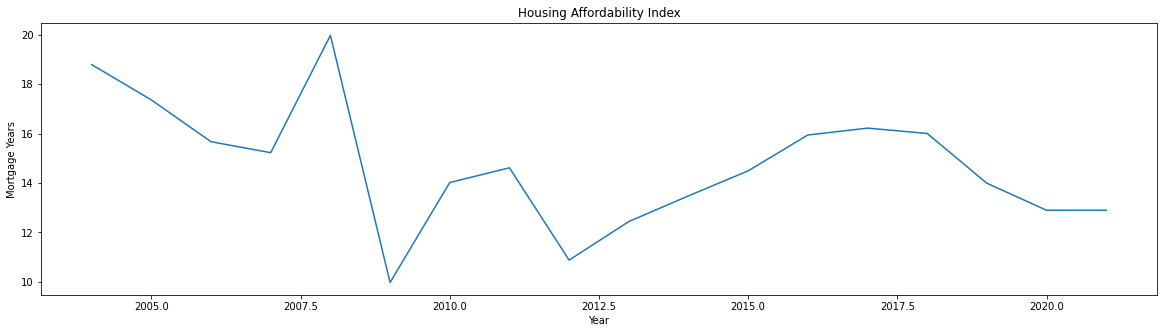

In [21]:
df['Years to pay mortgage'].plot(title = 'Housing Affordability Index', ylabel = 'Mortgage Years', figsize=(20,5))

(400000.0, 1200000.0)

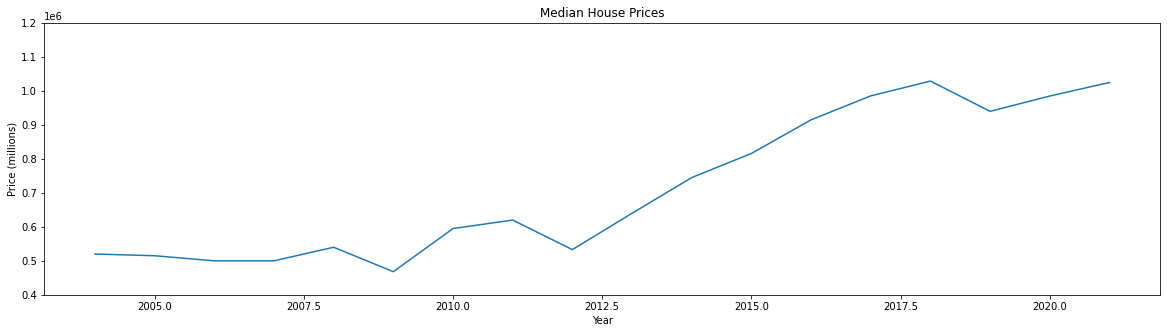

In [32]:
ax = df['Median House Price'].plot(title = 'Median House Prices', ylabel = 'Price (millions)', figsize=(20,5))
ax.set_ylim(400000,1200000)

# Housing PE Graph
#### Challenge = finding median rental data

<AxesSubplot:title={'center':'PE Ratio'}, xlabel='Year', ylabel='Price x'>

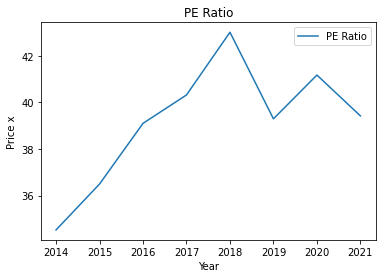

In [65]:
df.iloc[10:,[5]].plot(title = 'PE Ratio', ylabel = 'Price x')